<a href="https://colab.research.google.com/github/IZProjects/AI-Notebooks/blob/main/wave_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install fastai

In [ ]:
from fastai.vision.all import *
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Stuff/wave classification/wave_images/train.csv")
df_train.head()

,id,label
0,2,1
1,3,1
2,4,1
3,6,1
4,9,1


In [ ]:
df_train["id"] = df_train["id"].apply(lambda x: str(x) + ".png")
df_train["id"]

,id
0,2.png
1,3.png
2,4.png
3,6.png
4,9.png
...,...
3396,4855.png
3397,4856.png
3398,4857.png
3399,4858.png


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/AI Stuff/wave classification/wave_images/train_set"

dls = ImageDataLoaders.from_df(
    df=df_train,
    path=train_dir,
    valid_pct=0.2,
    seed=42,
    fn_col="id",
    label_col="label",
    item_tfms=Resize(size=(270,264), method='squish'), #save some memory coz free gpu
)

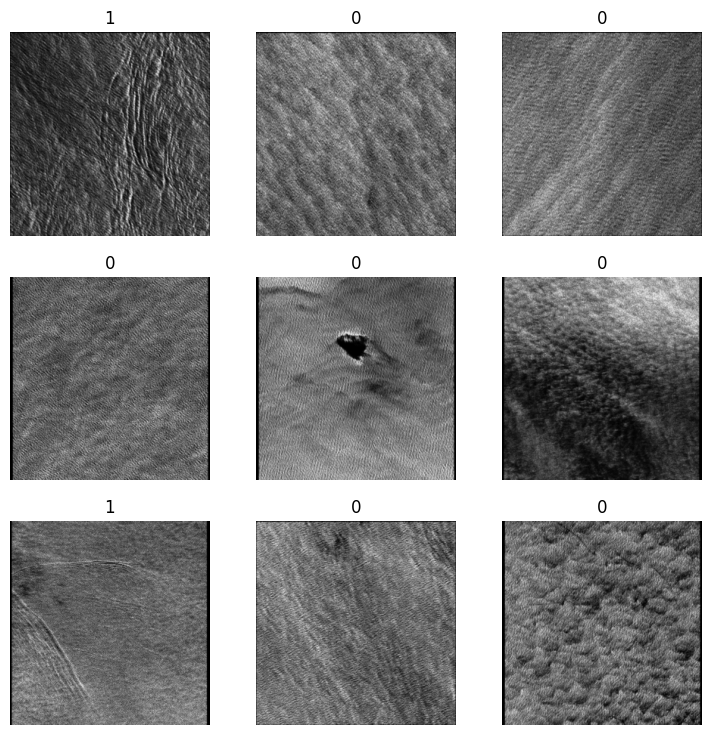

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, RocAucBinary()])


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.812681,0.719732,0.264706,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.525212,0.392471,0.142647,00:50


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Stuff/wave classification/wave_images/test.csv")
df_test.head()

,id
0,1
1,5
2,7
3,8
4,15


In [ ]:
df_test["id"] = df_test["id"].apply(lambda x: "/content/drive/MyDrive/Colab Notebooks/AI Stuff/wave classification/wave_images/test_set/" + str(x) + ".png")
test_file_paths = list(df_test["id"].values)
test_file_paths[0]

In [ ]:
test_dl = dls.test_dl(test_file_paths, item_tfms=Resize(size=(270,264), method='squish'),)

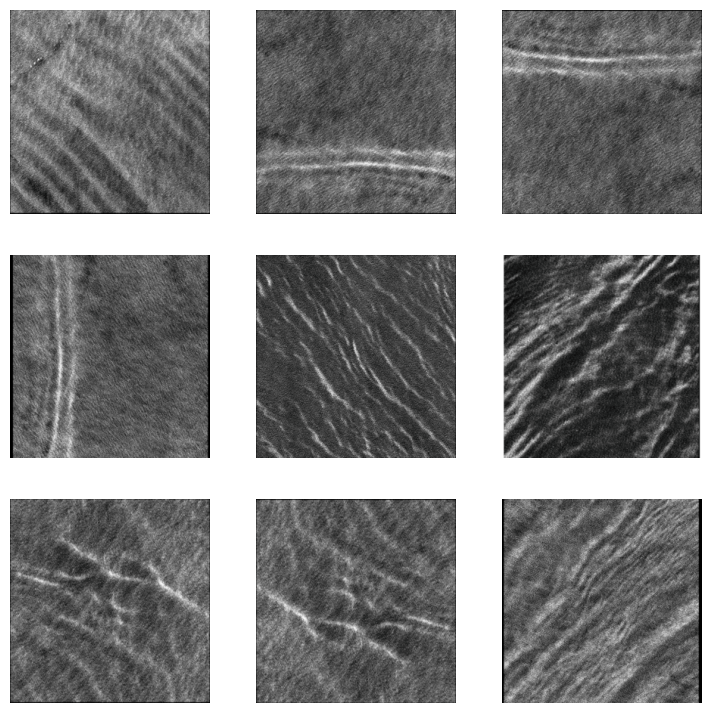

In [ ]:
test_dl.show_batch(max_n=9)

In [ ]:
predictions = learn.tta(dl=test_dl)

In [ ]:
answers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Stuff/wave classification/wave_images/solution.csv")
answers.head()

,id,label
0,1,1
1,5,1
2,7,1
3,8,1
4,15,1


In [ ]:
answers["prediction"] = predictions[0][:,1].cpu().numpy()

In [ ]:
answers['label_pred'] = [1 if answers.at[i, "prediction"] > 0.5 else 0 for i in range(len(answers))]


In [ ]:
errors = 0
for i in range(len(answers)):
  errors += abs(answers.at[i, "label_pred"] - answers.at[i, "label"])

correct = len(answers) - errors
accuracy = 1 - errors/len(answers)
print(f"The model got {correct} out of {len(answers)} predictions correct for an accuracy rate of: {accuracy: .2f}")

The model got 1251 out of 1459 predictions correct for an accuracy rate of:  0.86


In [ ]:
answers.head()

,id,label,prediction,label_pred
0,1,1,0.491980,0
1,5,1,0.994842,1
2,7,1,0.027881,0
3,8,1,0.990453,1
4,15,1,0.999987,1
